<a href="https://colab.research.google.com/github/MaxenceAr/Sinus-bruit-/blob/main/sinuso%C3%AFde_bruit%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sinus bruité**




On cherche à modèliser avec uniquement les outils du ML un sinus bruité

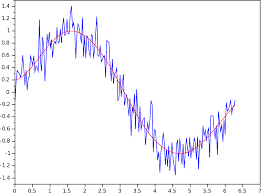

# Importations

In [81]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
import sklearn.linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error




In [82]:
chemin_fichier = '/content/sample_data/datareg_cos_1000.csv'
cos=pd.read_csv(chemin_fichier)
#si la commande au dessus ne permet pas d'ouvrir le fichier, écrire plutôt : pd.read_csv(chemin_fichier,encoding='latin-1')

# Analyse des données



In [83]:
cos.head()

,x,y
0,0.599251,2.428693
1,0.332134,-2.776315
2,0.385546,-0.852482
3,0.519101,-0.184924
4,0.611766,1.397634


In [84]:
print(cos['x'])

0      0.599251
1      0.332134
2      0.385546
3      0.519101
4      0.611766
         ...   
995    0.990832
996    0.778216
997    0.884755
998    0.344447
999    0.421573
Name: x, Length: 1000, dtype: float64


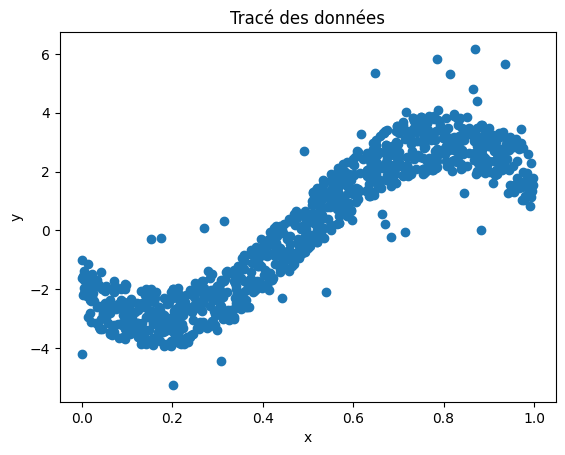

In [85]:
import matplotlib.pyplot as plt


# Tracer Y selon X
plt.scatter(cos['x'], cos['y'])

# Ajouter des étiquettes et un titre
plt.xlabel('x')
plt.ylabel('y')
plt.title('Tracé des données')

# Afficher le graphique
plt.show()

In [86]:
cos.describe()

,x,y
count,1000.000000,1000.000000
mean,0.498417,0.078527
std,0.280750,2.414516
min,0.001380,-5.254349
25%,0.252815,-2.218644
50%,0.506054,0.241669
75%,0.738501,2.276343
max,0.997779,6.168772


In [87]:
y=cos["y"]
cos = cos.drop('y', axis=1)

In [88]:
print(y)

0      2.428693
1     -2.776315
2     -0.852482
3     -0.184924
4      1.397634
         ...   
995    0.823103
996    3.782802
997    2.522569
998   -2.171908
999   -0.195805
Name: y, Length: 1000, dtype: float64


In [89]:
X_train, X_validation, y_train, y_validation = train_test_split(cos, y, shuffle=True,test_size=0.1, random_state=42)

In [90]:
X_train.describe()

,x
count,900.000000
mean,0.502163
std,0.281132
min,0.001380
25%,0.260280
50%,0.513642
75%,0.751634
max,0.997779


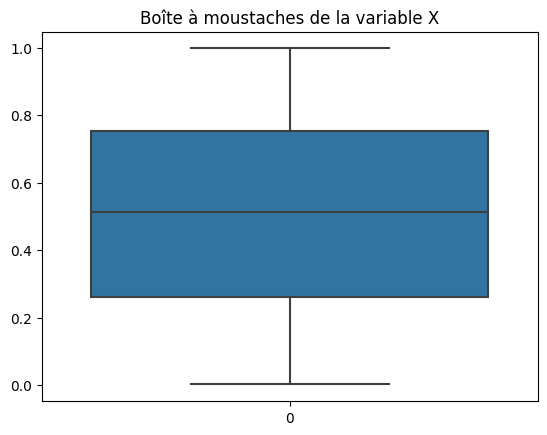

In [91]:
sns.boxplot(X_train['x'])

# Ajouter un titre au graphique (facultatif)
plt.title('Boîte à moustaches de la variable X')

# Afficher le graphique
plt.show()

array([[<Axes: title={'center': 'x'}>]], dtype=object)

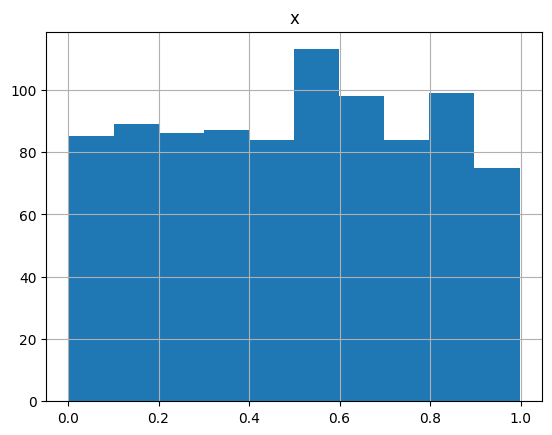

In [92]:
X_train.hist()

#Préparation des données

In [93]:
#pas besoin du standard scaler ici comme on a une seule variable
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

#Modèles ML

Comme on a au départ une seule variable, il n'est pas intéressant d'essayer une SVM (car pas de problèmes de complexité avec les régressions polynomiales)

In [94]:
knn_mod = KNeighborsRegressor()
pipeline_knn = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('modele', knn_mod)
])

rdm_forest_mod = RandomForestRegressor()
pipeline_rdm_forest = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('modele', rdm_forest_mod)
])

linear_reg_mod=sklearn.linear_model.LinearRegression()
pipeline_linear_reg = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('modele', linear_reg_mod)
])

lasso_mod=sklearn.linear_model.Lasso(alpha=0.1)
pipeline_lasso = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('modele', lasso_mod)
])

pipeline_polynomial_regression_deg3 = make_pipeline(
    PolynomialFeatures(degree=3),sklearn.linear_model.LinearRegression())

pipeline_polynomial_regression_deg5 = make_pipeline(numerical_transformer,
    PolynomialFeatures(degree=5),sklearn.linear_model.LinearRegression())

pipeline_polynomial_regression_deg7 = make_pipeline(
    PolynomialFeatures(degree=7),sklearn.linear_model.LinearRegression())



In [95]:
mse_scores_knn = cross_val_score(pipeline_knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_knn = -mse_scores_knn

# Afficher la moyenne des scores MSE
print("Moyenne MSE KNN :", np.mean(mse_scores_knn))

Moyenne MSE KNN : 0.5801486661637556


In [96]:
mse_scores_rdm = cross_val_score(pipeline_rdm_forest, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_rdm = -mse_scores_rdm

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_rdm))

Moyenne MSE Random Forest : 0.7162062509236289


In [97]:
mse_scores_linear = cross_val_score(pipeline_linear_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_linear = -mse_scores_linear

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_linear))

Moyenne MSE Random Forest : 1.1186825641361602


In [98]:
mse_scores_lasso = cross_val_score(pipeline_lasso, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_lasso = -mse_scores_lasso

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_lasso))

Moyenne MSE Random Forest : 1.1292457755608525


In [99]:
mse_scores_poly3 = cross_val_score(pipeline_polynomial_regression_deg3, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_poly3 = -mse_scores_poly3

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_poly3))

Moyenne MSE Random Forest : 0.49378197251728856


In [100]:
mse_scores_poly5 = cross_val_score(pipeline_polynomial_regression_deg5, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_poly5 = -mse_scores_poly5

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_poly5))

Moyenne MSE Random Forest : 0.49289255070612265


In [101]:
mse_scores_poly7 = cross_val_score(pipeline_polynomial_regression_deg7, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# La fonction 'neg_mean_squared_error' renvoie l'opposé du MSE, car cross_val_score maximise la métrique
# Nous devons prendre l'opposé pour obtenir le MSE
mse_scores_poly7 = -mse_scores_poly7

# Afficher la moyenne des scores MSE
print("Moyenne MSE Random Forest :", np.mean(mse_scores_poly7))

Moyenne MSE Random Forest : 0.49435682903661454


La regression polynomiale de degré 5 est le modèle avec les meilleurs résultats

# Visualiation et validation sur le jeu de test

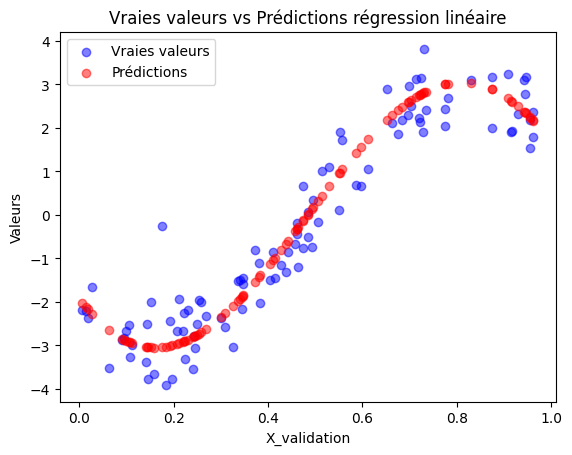

Mean Squared Error : 0.38722621179662886


In [102]:
pipeline_polynomial_regression_deg5.fit(X_train,y_train)
y_pred_validation = pipeline_polynomial_regression_deg5.predict(X_validation)
plt.scatter(X_validation, y_validation, label='Vraies valeurs', color='blue', alpha=0.5)
plt.scatter(X_validation, y_pred_validation, label='Prédictions', color='red', alpha=0.5)

# Ajouter des étiquettes et un titre
plt.xlabel('X_validation')
plt.ylabel('Valeurs')
plt.title('Vraies valeurs vs Prédictions régression linéaire')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

mse = mean_squared_error(y_validation, y_pred_validation)

print("Mean Squared Error :", mse)



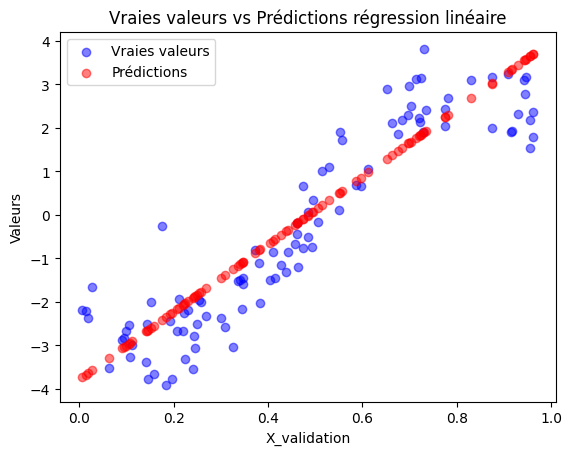

Mean Squared Error : 0.8560017308477454


In [103]:
pipeline_linear_reg.fit(X_train,y_train)
y_pred_validation = pipeline_linear_reg.predict(X_validation)
plt.scatter(X_validation, y_validation, label='Vraies valeurs', color='blue', alpha=0.5)
plt.scatter(X_validation, y_pred_validation, label='Prédictions', color='red', alpha=0.5)

# Ajouter des étiquettes et un titre
plt.xlabel('X_validation')
plt.ylabel('Valeurs')
plt.title('Vraies valeurs vs Prédictions régression linéaire')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

mse = mean_squared_error(y_validation, y_pred_validation)

print("Mean Squared Error :", mse)

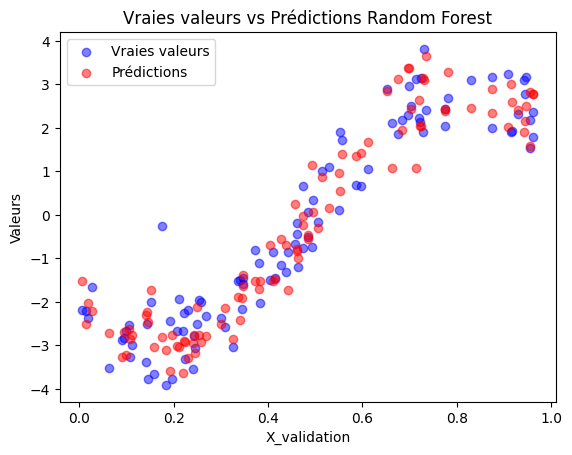

Mean Squared Error : 0.6253167477489016


In [104]:
pipeline_rdm_forest.fit(X_train,y_train)
y_pred_validation = pipeline_rdm_forest.predict(X_validation)
plt.scatter(X_validation, y_validation, label='Vraies valeurs', color='blue', alpha=0.5)
plt.scatter(X_validation, y_pred_validation, label='Prédictions', color='red', alpha=0.5)

# Ajouter des étiquettes et un titre
plt.xlabel('X_validation')
plt.ylabel('Valeurs')
plt.title('Vraies valeurs vs Prédictions Random Forest')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

mse = mean_squared_error(y_validation, y_pred_validation)

print("Mean Squared Error :", mse)


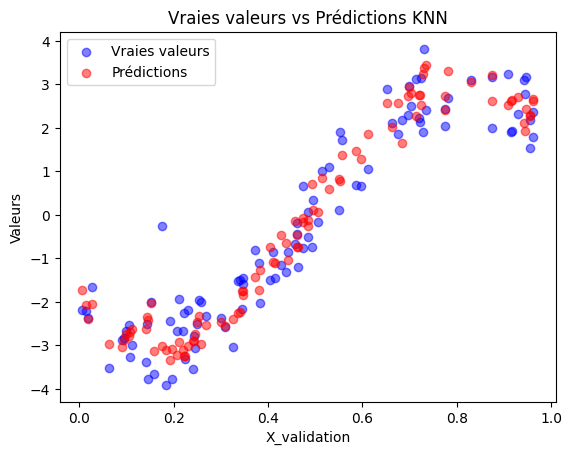

Mean Squared Error : 0.4515076476157784


In [105]:
pipeline_knn.fit(X_train,y_train)
y_pred_validation = pipeline_knn.predict(X_validation)
plt.scatter(X_validation, y_validation, label='Vraies valeurs', color='blue', alpha=0.5)
plt.scatter(X_validation, y_pred_validation, label='Prédictions', color='red', alpha=0.5)

# Ajouter des étiquettes et un titre
plt.xlabel('X_validation')
plt.ylabel('Valeurs')
plt.title('Vraies valeurs vs Prédictions KNN')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

mse = mean_squared_error(y_validation, y_pred_validation)

print("Mean Squared Error :", mse)
